In [2]:
# Import libraries
import os
from pprint import pprint
import datetime

# Data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("ticks")
sns.set_context("notebook")

# **Madrid AirBnb Data**
In this analysis we are going to use the original raw data from Airbnb for the city of Madrid, Spain. We are going to expose 3 business questions that could be solved by means of anayzing the data provided

## Table of contents
1. *View from the bridge: explanation of variables, scope, etc*
2. *Propose some business questions or possible insights that we could answer with the data we have*
3. *Arrange the dataset from all the sources available so that it contains the maximum information possible*
4. *Analyze statistically the data, evaluate missing values and present a hypothesis to clean the data*
5. *Analyze possible correlations among features, explore on useful data transformations*
6. *Modelling: Set a target variable that we want to predict based on the business question proposed and experiment different machine learning models*

### 1. View from the bridge
In this particular section, we are going to introduce the overall and general particularities of the data provided. Airbnb datasets are publicly available from the source http://insideairbnb.com/get-the-data.html. It contains datasets from a lot of and cities and countries all over the world where Airbnb is present.

#### 1.1. Source datasets
The data from the city of madrid comes segregated in 3 different sources. "calendar.csv", "listings.csv" and "reviews.csv"

In [4]:
# Load the datasets available
data = r"data"
calendar = os.path.join(data, "calendar.csv")
listings = os.path.join(data, "listings.csv")
reviews = os.path.join(data, "reviews.csv")

caldf = pd.read_csv(calendar)
listdf = pd.read_csv(listings)
revdf = pd.read_csv(reviews)

c:\users\manuelmartin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


> ***Description of each source file***: *(All files have been compiled on 8th of March, 2019)*
- *calendar.csv: Detailed calendar data for listings in Madrid. This file contains the periods of time where*
- *listings.csv: Detailed listings data for Madrid*
- *reviews.csv: Detailed review data for listings in Madrid*


In [5]:
# Overview of available datasets
def show_information_from_dataset(df, name):
    
    print(df.info())  
    missing_values_rate = (caldf.isna().sum()/df.shape[0]).sum()/df.shape[1]
    
    print("=="*40)
    print(f"""
    {name} Dataset Information:
    Number of rows: {df.shape[0]},
    Number of features: {df.shape[1]},
    Missing values rate: {missing_values_rate}
    """)
    print("=="*40)
    
show_information_from_dataset(caldf, "Calendar")
show_information_from_dataset(listdf, "Listings")
show_information_from_dataset(revdf, "Reviews")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444440 entries, 0 to 6444439
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 344.2+ MB
None

    Calendar Dataset Information:
    Number of rows: 6444440,
    Number of features: 7,
    Missing values rate: 0.0
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17656 entries, 0 to 17655
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 14.3+ MB
None

    Listings Dataset Information:
    Number of rows: 17656,
    Number of features: 106,
    Missing values rate: 0.0
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615004 entries, 0 to 615003
Data columns (total 6 columns):
listing_id       615004 non-null int64
id               615004 non-null int64
date             615004 non-

#### Calendar Dataset

 > ***Visualization of sample rows from Calendar Dataframe***:  This dataset contains the dates from all the different listings information in terms of price and availablity. It contains more than one row per listing_id because the prices and availability changes per day. The availability is encoded as "f" and "t" where "f" means False and "t" means True. The adjusted price is also encoded as a string because it contains the dollar symbol. We can see from the date range that it is also considered a very long range of time since march. At a certain point of time, the data won't be much reliable as there are a number of external factors that can affect the prices, availability, and minimum and maximum nights. It also seems that there are no missing values in the dataset.

In [6]:
caldf.head(6)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6369,2019-03-08,f,$50.00,$50.00,3,30
1,283862,2019-03-08,f,$150.00,$150.00,1,1125
2,283862,2019-03-09,f,$85.00,$85.00,1,1125
3,283862,2019-03-10,f,$70.00,$70.00,1,1125
4,283862,2019-03-11,t,$50.00,$50.00,1,1125
5,283862,2019-03-12,t,$50.00,$50.00,1,1125


In [7]:
print(f"Minimum date considered {caldf.date.min()}")
print(f"Maximum date considered {caldf.date.max()}")

Minimum date considered 2019-03-08
Maximum date considered 2020-03-06


In [8]:
# Find missing values in each feature
caldf.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

> *Minor data type adjustments on features: We will transform "date" as a proper datetime feature, and transform prices into a quantitative field rather than a string. We will also encode "available" feature to be a 0 or 1.*

In [9]:
# Transform date field into date time
caldf["datetime"] = pd.to_datetime(caldf["date"], format="%Y-%m-%d")

# Transform available categories into binary
caldf["available"] = caldf["available"].astype("category").cat.codes

# Transform prices string value into float
caldf["price"] = caldf["price"].apply(lambda x: float(x[1:].replace(",", "")))
caldf["adjusted_price"] = caldf["adjusted_price"].apply(lambda x: float(x[1:].replace(",", "")))

> *Visualize mean price by date: Check if there is some peak season in which prices are very high*

In [10]:
mean_price_by_date = caldf.groupby(["datetime"])["price"].mean()
mean_adjustedprice_by_date = caldf.groupby(["datetime"])["adjusted_price"].mean()

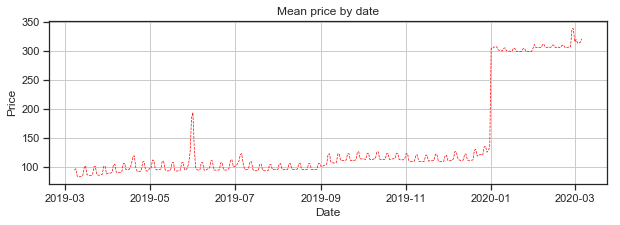

In [11]:
plt.figure(figsize=(10,3))
plt.title("Mean price by date")
plt.grid(True)
plt.plot(mean_price_by_date, c="red", linestyle="--", linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Listings

 > ***Visualization of sample rows from Listings Dataframe***:

In [12]:
listdf.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190308052744,2019-03-08,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,Nice and definitely non touristic neighborhoo...,...,f,f,flexible,f,f,1,0,1,0,0.55
1,21853,https://www.airbnb.com/rooms/21853,20190308052744,2019-03-08,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.61
2,24805,https://www.airbnb.com/rooms/24805,20190308052744,2019-03-08,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...",none,"The area is next to the Gran Via, so people li...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.04


In [13]:
listdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17656 entries, 0 to 17655
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

> *Removal of features not relevant to the case*

In [14]:
url_related_features = ["thumbnail_url", "medium_url", "picture_url", "xl_picture_url", "host_url", "host_thumbnail_url", "host_picture_url"]
listdf = listdf.drop(url_related_features, axis=1)

#### ***Data Cleaning and transformations***

*At this step, we are going to perform a first cleaning of the listings dataframe, which consists of a large range of features. Some of them are encoded as categories, others need to be encoded as numbers, others need to be refactored, etc*

> *Missing Values Analysis: Analyze the number of missing values in the dataset. Check if the appearance of missing values are from the type MAR or NMAR to validate if the missing values follow a specific pattern or not*

***Type of missing values***
- *Missing values at Random: The observed missing values are randomly distributed across more than 1 sample of the dataset.*
- *Missing Completely at Random: This happens when all missing values are randomly distributed throughout all observations. This can be confirmed by splitting the dataset in 2, one containing all missing values and the other containing the no missing values. We can use then, the t-test to find statistic differences among the dataset samplings*
- *Non ignorable Missing Values: These are the missing values that are not randomly distributed and follow a certain pattern*

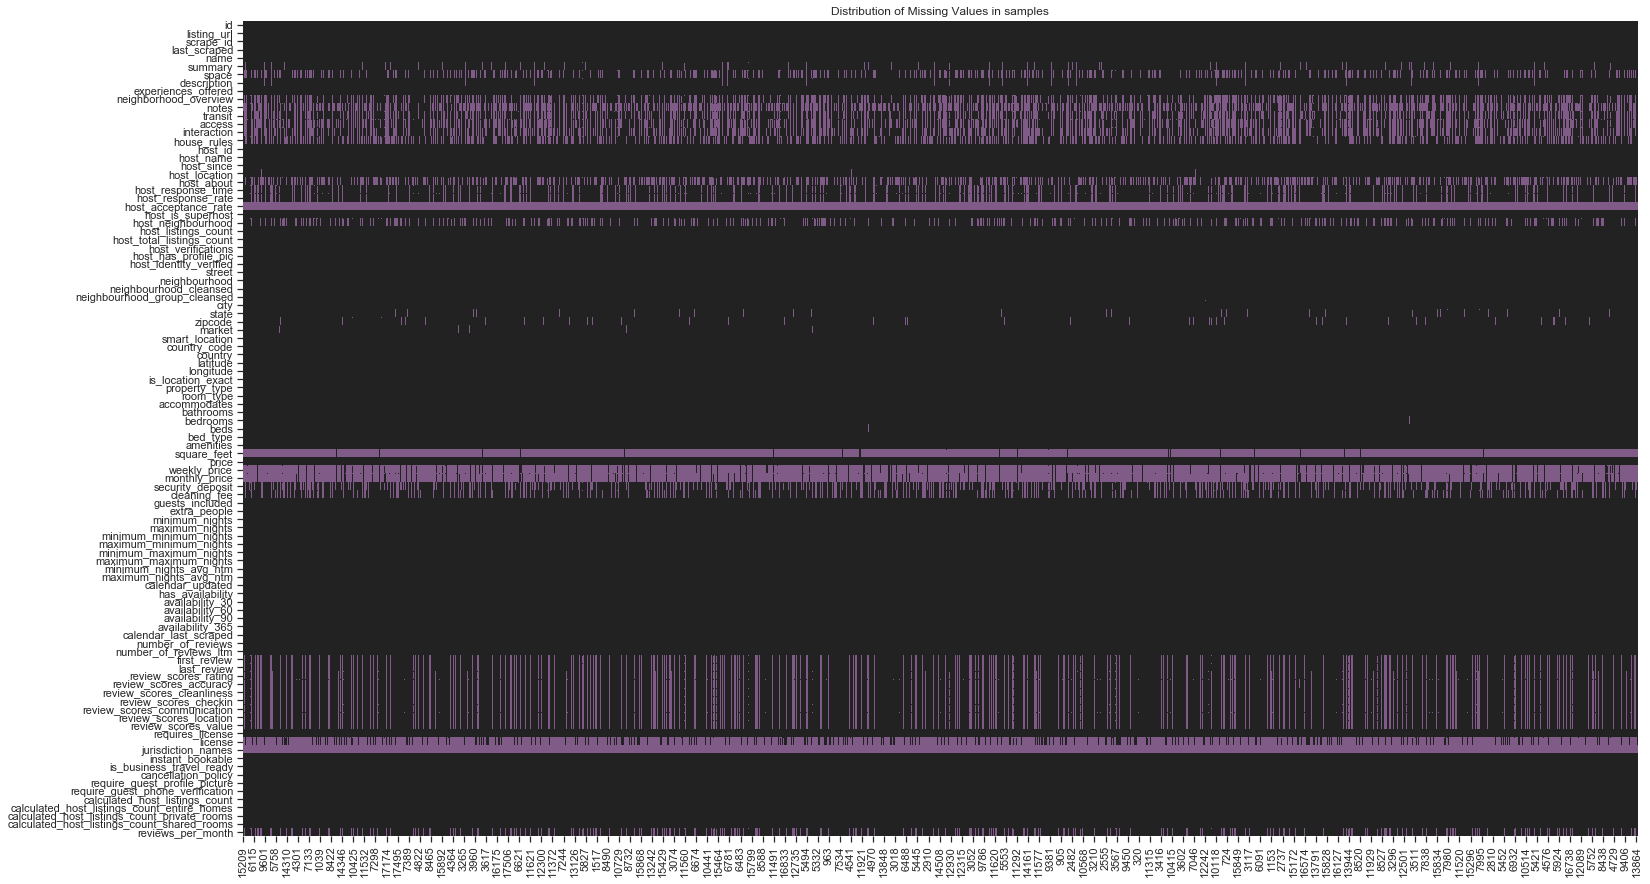

In [15]:
plt.figure(figsize=[25,15])
plt.title("Distribution of Missing Values in samples")
sns.heatmap(listdf.sample(frac=1).isna().T, cbar=False, yticklabels=True, square=False, cmap=sns.dark_palette("muted purple", input="xkcd"))
plt.show()

> *At first glance, there seems to be no relationship among the appeareances of missing values from the sample above and the feature where they belong. The existence of missing values is closely related with the optional and mandatory data or information that must be provided when posting a listing in Airbnb. We can conclude that the missing values presented in this dataset are of the type MAR, so there is no need to convey a further analysis on missing values pattern recognition. After this assesment, we are going to remove the features that have a very high rate of missing values as they won't give us enought representativity within the upcoming analysis and business cases to be proposed*

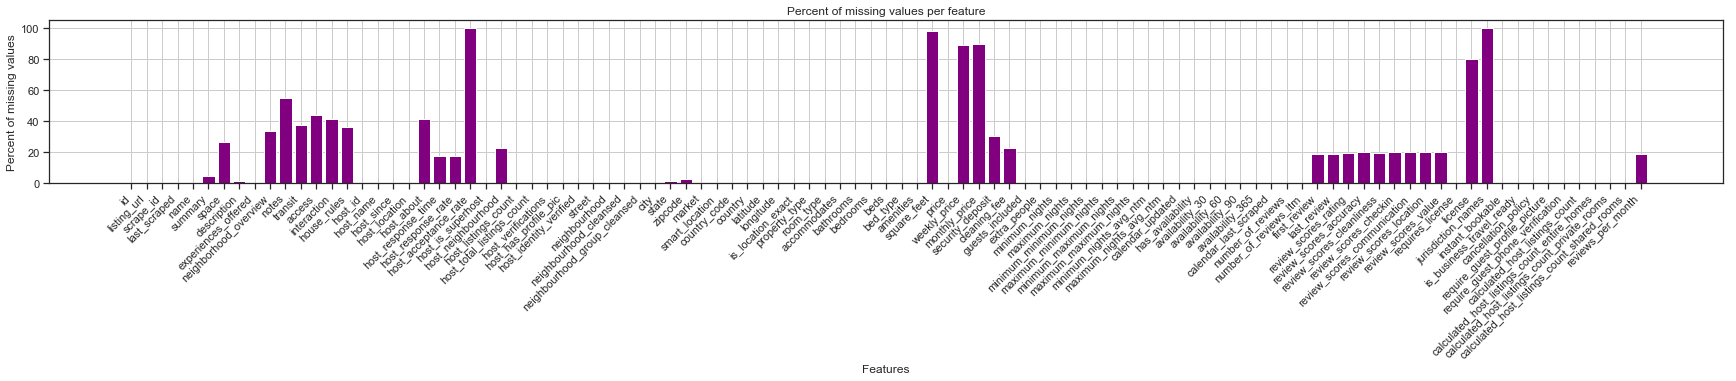

In [16]:
# Plot the amount of missing values per feature

plt.figure(figsize=(30, 3))
plt.title("Percent of missing values per feature")
plt.bar(listdf.isna().sum().index, (listdf.isna().sum().values/listdf.shape[0])*100, color="purple")
plt.grid(True)
plt.xlabel("Features")
plt.ylabel("Percent of missing values")
plt.xticks(rotation=45, ha="right")
plt.show()

In [17]:
# Delete the rows with a very high number of missing values (>25%)
threshold = 0.15
columns_to_drop = listdf.columns[listdf.isna().sum()/listdf.shape[0] > threshold].tolist()
print("Columns to be dropped...")
for col in columns_to_drop:
    print(f"- {col}")
     
listdf = listdf.drop(labels=columns_to_drop, axis=1)

Columns to be dropped...
- space
- neighborhood_overview
- notes
- transit
- access
- interaction
- house_rules
- host_about
- host_response_time
- host_response_rate
- host_acceptance_rate
- host_neighbourhood
- square_feet
- weekly_price
- monthly_price
- security_deposit
- cleaning_fee
- first_review
- last_review
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value
- license
- jurisdiction_names
- reviews_per_month


> *Analyze string-data-type features: Visualize some examples of each of the string columns present in the dataset*

In [18]:
string_columns = listdf.select_dtypes(include="O").columns.tolist()

In [19]:
# Analyze amount of missing values per row
np.round((listdf.select_dtypes(include="O").isna().sum()/listdf.shape[0])*100, 2)

listing_url                         0.00
last_scraped                        0.00
name                                0.03
summary                             4.59
description                         1.80
experiences_offered                 0.00
host_name                           0.02
host_since                          0.02
host_location                       0.24
host_is_superhost                   0.02
host_verifications                  0.00
host_has_profile_pic                0.02
host_identity_verified              0.02
street                              0.00
neighbourhood                       0.01
neighbourhood_cleansed              0.00
neighbourhood_group_cleansed        0.00
city                                0.02
state                               1.60
zipcode                             2.75
market                              0.18
smart_location                      0.00
country_code                        0.00
country                             0.00
is_location_exac

In [20]:
# Drop all null rows from the string features exposed above
indices_to_maintain = listdf[string_columns].dropna().index
listdf = listdf[listdf.index.isin(listdf.index[indices_to_maintain])]

In [21]:
# Show an example of each row
string_columns = listdf.select_dtypes(include="O").columns.tolist()
for col in string_columns:
    print(f"\n{col}")
    print(f"{col} - {listdf[col][2]}")
    print(f"{listdf[col].describe()}")


listing_url
listing_url - https://www.airbnb.com/rooms/24805
count                                     16026
unique                                    16026
top       https://www.airbnb.com/rooms/29149948
freq                                          1
Name: listing_url, dtype: object

last_scraped
last_scraped - 2019-03-08
count          16026
unique             1
top       2019-03-08
freq           16026
Name: last_scraped, dtype: object

name
name - Gran Via Studio Madrid
count                                                16026
unique                                               15605
top       Fantastic residence ``FUNWAY´´ north zone Madrid
freq                                                    19
Name: name, dtype: object

summary
summary - Studio located 50 meters from Gran Via, next to the Plaza de Callao. In the best shopping and cinemas and theaters. Comfortable apartment for 3 people. 1 bed and  the sofa bed in the lounge. Fully furnished.
count     16026
unique    1462

> *Decisions to make:* 
- *Remove features who owns low variance, that is, less than 2 unique values*
- *Binary encode features that have 2 categories ("t" and "f")*

In [22]:
to_remove = []
to_encode = []
for col in listdf.select_dtypes(include="O").columns.tolist():
    unique = listdf[col].unique()
    if len(unique) < 2:
        to_remove.append(col)
    elif len(unique) == 2:
        to_encode.append(col)

In [23]:
for col in to_encode:
    listdf[col] = listdf[col].astype("category").cat.codes

print(f"Columns Removed: {to_remove}")
print(f"Columns Encoded: {to_encode}")

Columns Removed: ['last_scraped', 'experiences_offered', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'is_business_travel_ready']
Columns Encoded: ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']


In [24]:
try:
    listdf = listdf.drop(["calendar_updated"], axis=1)
    listdf = listdf.drop(to_remove, axis=1)
    listdf = listdf.drop(["listing_url"], axis=1)
    listdf = listdf.drop(["name"], axis=1)
except:
    pass

> *Analyze remaining features in the dataset from the strings data type: There are a bunch of features in the dataset tha can serve as a great help to discover hidden patterns within the data*

In [25]:
["street"
"neighbourhood"
"neighbourhood_cleansed"
"neighbourhood_group_cleansed"
"city"]

['streetneighbourhoodneighbourhood_cleansedneighbourhood_group_cleansedcity']

In [26]:
listdf.price = listdf.price.apply(lambda x: float(x[1:].replace(",","")))
lists_to_draw = listdf[listdf.price <= float(listdf.price.quantile(0.95))]

In [27]:
neighs = listdf.neighbourhood_group_cleansed.unique()
annotated_centers = []

for neigh in neighs:
    lats_mean = listdf[listdf.neighbourhood_group_cleansed == neigh].latitude.mean()
    longs_mean = listdf[listdf.neighbourhood_group_cleansed == neigh].longitude.mean()
    annotated_centers.append((neigh, longs_mean, lats_mean))

In [28]:
annotated_centers

[('Chamartín', -3.677833614457831, 40.451564963855425),
 ('Latina', -3.7417525056947607, 40.403976195899766),
 ('Centro', -3.7038163658940397, 40.41658781575213),
 ('Arganzuela', -3.6993573234624146, 40.40130396355354),
 ('Fuencarral - El Pardo', -3.705938516483516, 40.48667692307692),
 ('Salamanca', -3.6771643881453153, 40.42877205544933),
 ('Ciudad Lineal', -3.651018208955224, 40.43731917910448),
 ('Chamberí', -3.703408898007034, 40.435087608440796),
 ('Villaverde', -3.6929924770642195, 40.350172660550456),
 ('Hortaleza', -3.6432720772946863, 40.47324966183575),
 ('Carabanchel', -3.726768494117647, 40.39029298823529),
 ('Retiro', -3.6774113508064517, 40.409904072580645),
 ('Tetuán', -3.700193546218487, 40.45764050420168),
 ('Moncloa - Aravaca', -3.7243784304932737, 40.43426683856502),
 ('Moratalaz', -3.6476813924050617, 40.405511772151904),
 ('San Blas - Canillejas', -3.610739333333333, 40.435847025641024),
 ('Barajas', -3.585255090909091, 40.467760818181816),
 ('Usera', -3.703742327

*Data Transformations for geographical data*

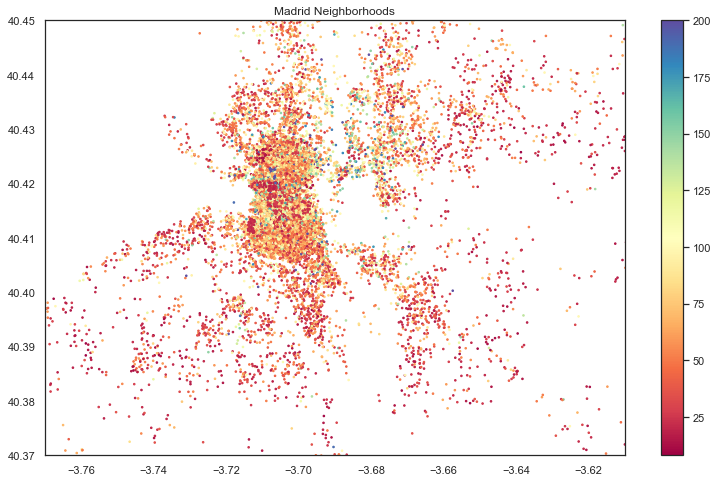

In [29]:
sns.set_style("white")
fig = plt.figure(figsize=(13, 8))
plt.title("Madrid Neighborhoods")
plt.scatter(lists_to_draw.longitude, 
            lists_to_draw.latitude, 
            s=10, marker=".", 
            c=lists_to_draw.price,
            cmap="Spectral")
plt.xlim(-3.77, -3.61)
plt.ylim(40.37, 40.45)
plt.colorbar()
plt.show()

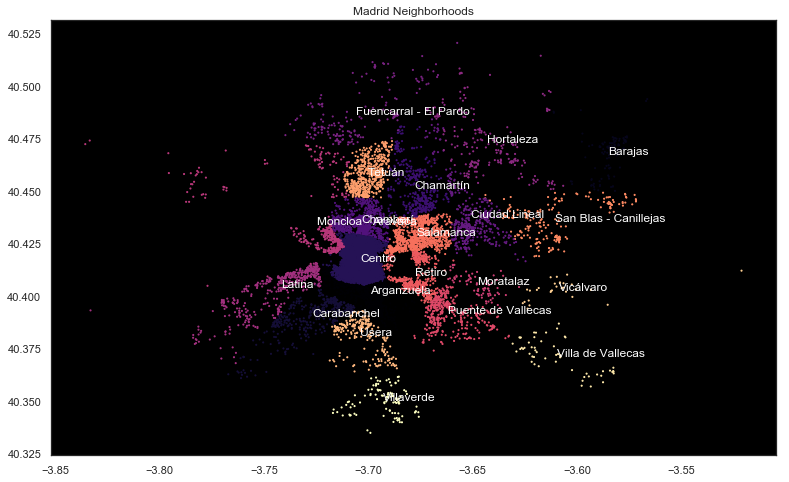

In [30]:
sns.set_style("white")
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)
ax.set_facecolor('xkcd:black')
plt.title("Madrid Neighborhoods")
plt.scatter(lists_to_draw.longitude, 
            lists_to_draw.latitude, 
            s=5, marker=".", 
            c=lists_to_draw.neighbourhood_group_cleansed.astype("category").cat.codes,
            cmap="magma")
#plt.xlim(-3.77, -3.61)
#plt.ylim(40.37, 40.45)

for pair in annotated_centers:
    ax.annotate(pair[0], xy=(pair[1], pair[2]), color="white")

plt.show()

### Which are the neighbourhoods with higher density of Airbnb listings?

The common sense tell us that the center of Madrid will be the most dense zone of the city where Airbnb is present. But let's confirm it. The way to do it is just by counting the listings that belong to each neighbourhood.

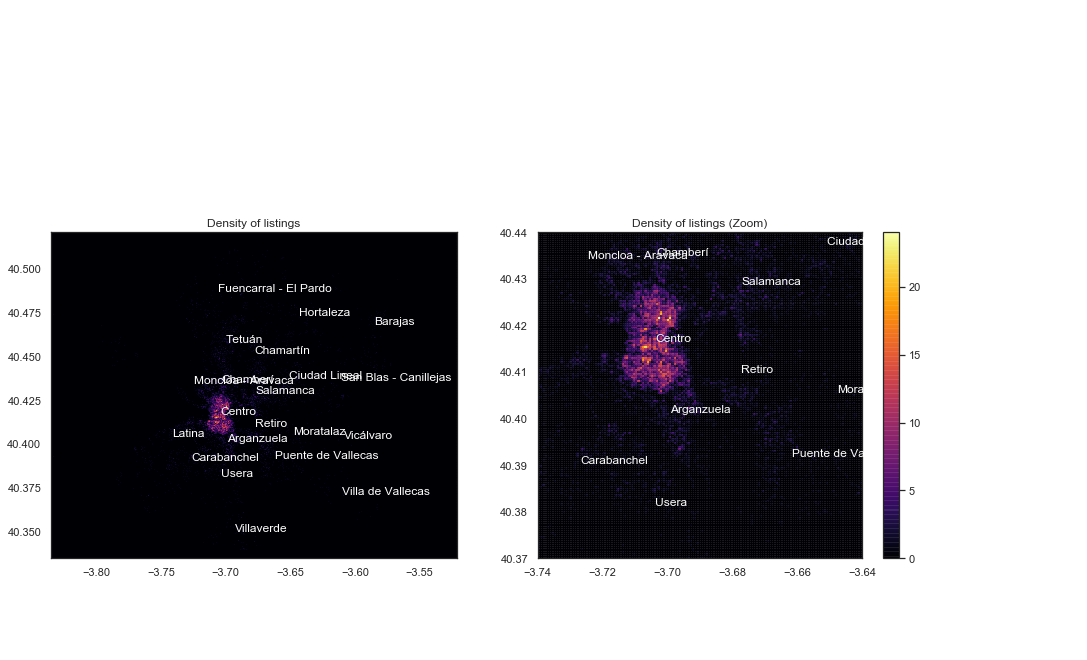

In [116]:
#sns.set_style("white")

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121)
plt.title("Density of listings")
plt.hist2d(lists_to_draw.longitude, 
            lists_to_draw.latitude, bins=450, normed=False, cmap="inferno", alpha=0.9)
#plt.xlim(-3.77, -3.61)
#plt.ylim(40.37, 40.45)

for pair in annotated_centers:
    ax.annotate(pair[0], xy=(pair[1], pair[2]), color="white")

ax = fig.add_subplot(122)
plt.title("Density of listings (Zoom)")
plt.hist2d(lists_to_draw.longitude, 
            lists_to_draw.latitude, bins=450, normed=False, cmap="inferno", alpha=0.9)
plt.xlim(-3.74, -3.64)
plt.ylim(40.37, 40.44)

for pair in annotated_centers:
    ax.annotate(pair[0], xy=(pair[1], pair[2]), color="white")
plt.colorbar()
plt.show()

*Conclusion* We can confirm that our hypothesis is correct, the neigbourhood "Centro" is the most dense zone in the city in terms of Airbnb listings.

#### In which neighbourhood is it more expensive to stay?

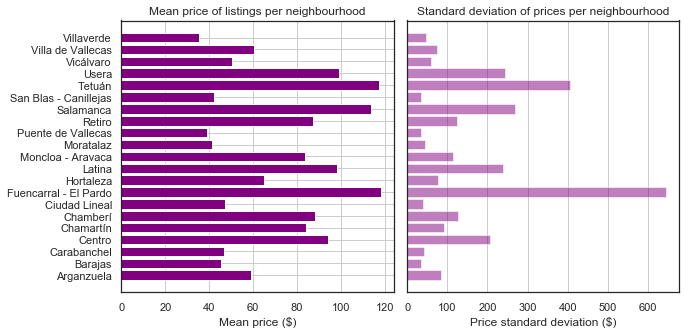

In [167]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05)
ax = fig.add_subplot(121)
plt.title("Mean price of listings per neighbourhood")
plt.barh(listdf[["neighbourhood_group_cleansed", "price"]].groupby(by="neighbourhood_group_cleansed").mean().index,
        listdf[["neighbourhood_group_cleansed", "price"]].groupby(by="neighbourhood_group_cleansed").mean().values.flatten(),
        color="purple")
plt.grid(True)
plt.xlabel("Mean price ($)")

ax2 = fig.add_subplot(122)
plt.title("Standard deviation of prices per neighbourhood")
plt.barh(listdf[["neighbourhood_group_cleansed", "price"]].groupby(by="neighbourhood_group_cleansed").std().index,
        listdf[["neighbourhood_group_cleansed", "price"]].groupby(by="neighbourhood_group_cleansed").std().values.flatten(),
        color="purple", alpha=0.5)
plt.yticks([])
plt.xlabel("Price standard deviation ($)")
plt.grid(True)
plt.show()

We can visualize in the barplots above that there is a lot of variablity in the neighbourhoods. Nevertheless, there are clear winners in terms of price. For example, "Tetúan", "Salamanca" and "Fuencarral - El Pardo" are the neighbourhoods with the highest mean price. However, it seems that in "Fuencarral - El Pardo" there is also a lot of deviation, which may be indicative of existing very luxury listings there.

### What can we say about the number of bedrooms of the listing and its relation with the potential guests?

We can assume that the number of bedrooms is a good indicative of the size of the place.

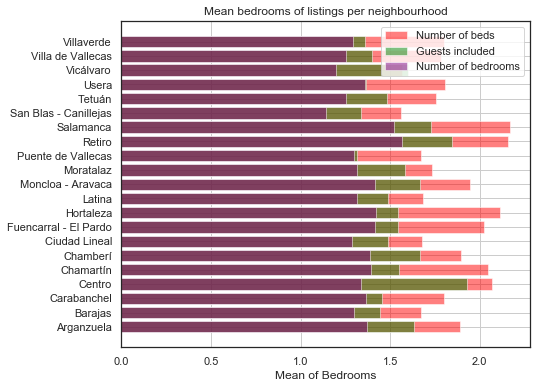

In [163]:
fig = plt.figure(figsize=(15, 6))
plt.subplots_adjust(wspace=0.05)
ax = fig.add_subplot(121)
plt.title("Mean bedrooms of listings per neighbourhood")
plt.barh(listdf[["neighbourhood_group_cleansed", "beds"]].groupby(by="neighbourhood_group_cleansed").mean().index,
        listdf[["neighbourhood_group_cleansed", "beds"]].groupby(by="neighbourhood_group_cleansed").mean().values.flatten(),
        color="red", alpha=0.5)
plt.barh(listdf[["neighbourhood_group_cleansed", "guests_included"]].groupby(by="neighbourhood_group_cleansed").mean().index,
        listdf[["neighbourhood_group_cleansed", "guests_included"]].groupby(by="neighbourhood_group_cleansed").mean().values.flatten(),
        color="green", alpha=0.5)
plt.barh(listdf[["neighbourhood_group_cleansed", "bedrooms"]].groupby(by="neighbourhood_group_cleansed").mean().index,
        listdf[["neighbourhood_group_cleansed", "bedrooms"]].groupby(by="neighbourhood_group_cleansed").mean().values.flatten(),
        color="purple", alpha=0.5)


plt.grid(True)
plt.xlabel("Mean of Bedrooms")
plt.legend(["Number of beds", "Guests included", "Number of bedrooms"])
plt.show()

We can see in this plot, where we graph the mean number of bedrooms, guests included and the mean number of beds available in the listing, that there are some clear evidences and some others that may lead to interesting discoveries. For example, in "Salamanca" and "Retiro" is clear that the listings have more than 1 bedroom, frequently. But there are some other neighbourhoods as "Centro" or "Chamartín" which frequently have only one room, but in the other hand, it is very frequent to have more than 2 beds. This may say that there are a lot of  listings with only one bedroom, but at the same time, they have 2 beds in the listing (which could be, 2 beds in the same bedroom or 1 bed in the living room). This is interesting from the point of view of which type of guests may rent these listings, there is a clear indicative that these type of people don't mind to share the same bedroom or to sleep in the living room. 

### Are there any hosts who are making business in airbnb?

In [324]:
morethan10_hosts = (listdf.host_id.value_counts()[ listdf.host_id.value_counts() > 30])
hostsdf = listdf[listdf.host_id.isin(morethan10_hosts.index)]
hostsdf.shape

(1628, 59)

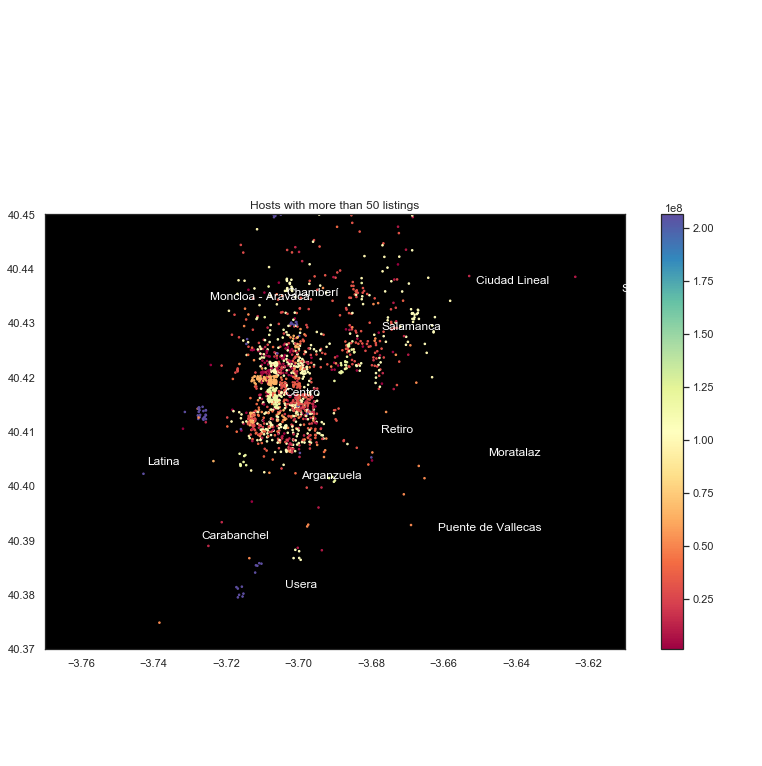

In [325]:
sns.set_style("white")
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)

ax.set_facecolor('xkcd:black')
plt.title("Hosts with more than 50 listings")
plt.scatter(hostsdf.longitude, 
            hostsdf.latitude, 
            s=10, marker=".", 
            c=hostsdf.host_id,
            cmap="Spectral")
plt.xlim(-3.77, -3.61)
plt.ylim(40.37, 40.45)


for pair in annotated_centers:
    ax.annotate(pair[0], xy=(pair[1], pair[2]), color="white")
    
plt.colorbar()
plt.show()                     

In [334]:

print(hostsdf[["host_id", "host_name", "neighbourhood_group_cleansed", "price", "id"]].groupby(["host_name", "neighbourhood_group_cleansed"], axis=0).agg({'id':'count', 'price':'mean'}).rename(columns={'id':'count of listings','price':'mean price'}).to_string())

                                                      count of listings   mean price
host_name               neighbourhood_group_cleansed                                
Agustin                 Centro                                       53    25.396226
                        Latina                                        1    18.000000
Apartamentos            Arganzuela                                    3    68.666667
                        Centro                                       50    87.700000
                        Chamartín                                     8    70.250000
                        Chamberí                                      9    63.666667
                        Ciudad Lineal                                 1    55.000000
                        Hortaleza                                     1    45.000000
                        Moncloa - Aravaca                             5    75.800000
                        Retiro                                   

In [369]:
print(hostsdf[["host_name", "neighbourhood_group_cleansed"l, "price", "id"]].groupby(["neighbourhood_group_cleansed", "host_name"], axis=0).agg({'id':'count', 'price':'mean'}).rename(columns={'id':'count of listings','price':'mean price'}).to_string())

                                                      count of listings   mean price
neighbourhood_group_cleansed host_name                                              
Arganzuela                   Apartamentos                             3    68.666667
                             Be Mate                                  3   130.000000
                             Eduardo Y Raul                           4    77.500000
                             Emilio                                   1    55.000000
                             Leticia                                  2    87.000000
                             Leticia Y Fer                            2    90.500000
                             Losvelys                                12    30.500000
                             MHR Madrid Holiday Rent                  2   537.000000
                             My Mad Madrid                            2    65.000000
                             Urban Vida Stays                    

In [381]:
aggrhosts = hostsdf[["host_name", "neighbourhood_group_cleansed", "price", "id"]].groupby(["neighbourhood_group_cleansed", "host_name"], axis=0, as_index=True).agg({'id':'count', 'price':'mean'}).rename(columns={'id':'count of listings','price':'mean price'})
aggrhosts.index.codes
neighs = aggrhosts.index.levels[0].tolist()
neighs_dict = {num : neigh for num, neigh in enumerate(neighs)}
hosts =  aggrhosts.index.levels[1].tolist()
hosts_dict = {num : neigh for num, neigh in enumerate(hosts)}

neighs_codes = aggrhosts.index.codes[0].tolist()
hosts_codes = aggrhosts.index.codes[1].tolist()

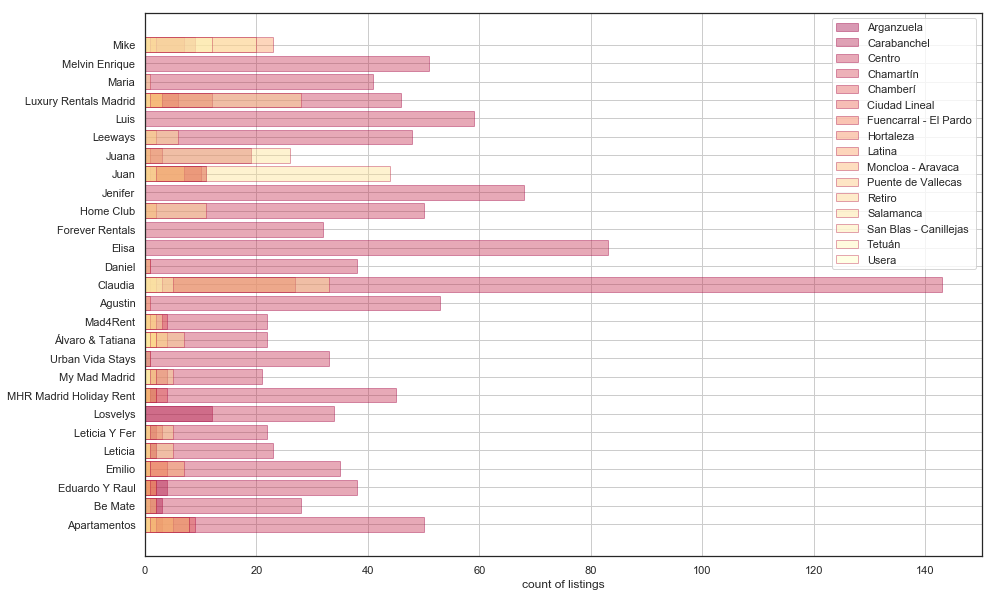

In [498]:
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=0,vmax=30)

plt.figure(figsize=(15, 10))
bl = plt.barh([hosts_dict[i] for i in aggrhosts.index.codes[1]], 
               aggrhosts.values[:, 0])

lb_obj = []

for c in np.unique(aggrhosts.index.codes[0]):
    lb_obj.append(Patch(facecolor=cm.Spectral(norm(int(c))), alpha=0.4, edgecolor=cm.Spectral(int(c)),
                         label=neighs_dict[int(c)]))
    
for bin, c in zip(bl, aggrhosts.index.codes[0].astype(np.float).tolist()):
    bin.set_color(cm.Spectral(norm(int(c))))
    bin.set_alpha(0.4)
    bin.set_edgecolor(cm.Spectral(int(c)))
    
plt.legend(handles=lb_obj)
plt.xlabel("count of listings")
plt.title("Count of listings per host and neighbourhood")
plt.grid(True)

plt.show()

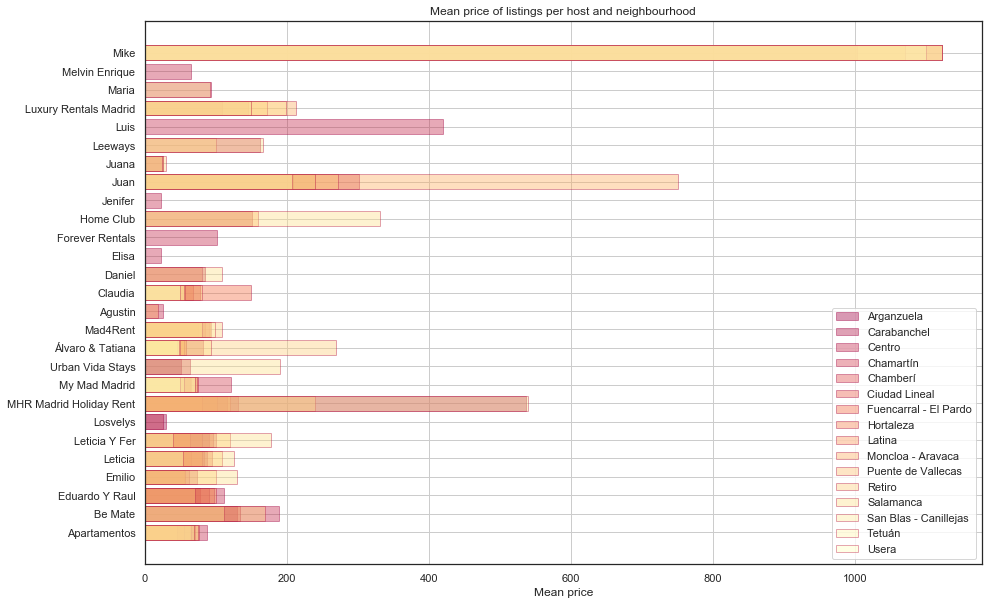

In [508]:
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=0,vmax=30)

plt.figure(figsize=(15, 10))
bl = plt.barh([hosts_dict[i] for i in aggrhosts.index.codes[1]], 
               aggrhosts.values[:, 1])

lb_obj = []

for c in np.unique(aggrhosts.index.codes[0]):
    lb_obj.append(Patch(facecolor=cm.Spectral(norm(int(c))), alpha=0.4, edgecolor=cm.Spectral(int(c)),
                         label=neighs_dict[int(c)]))
    
for bin, c in zip(bl, aggrhosts.index.codes[0].astype(np.float).tolist()):
    bin.set_color(cm.Spectral(norm(int(c))))
    bin.set_alpha(0.4)
    bin.set_edgecolor(cm.Spectral(int(c)))
    
plt.legend(handles=lb_obj)
plt.xlabel("Mean price")
plt.title("Mean price of listings per host and neighbourhood")
plt.grid(True)
plt.show()

### Price Prediction based on several  variables

In [46]:
# Copy the dataframe for cleaning purposes
mldf = listdf.copy()

In [51]:
mldf = mldf.drop(["host_id", "summary", "description", "scrape_id", "host_since", "host_location", "host_is_superhost", 
          "host_listings_count", "host_verifications", "host_has_profile_pic", "host_identity_verified", "street",
          "neighbourhood", "neighbourhood_cleansed", "city", "state", "zipcode", "market", "availability_30", "availability_60",
          "availability_90", "availability_365", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes",
          "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms"], axis=1)

In [164]:
mldf.info()

NameError: name 'mldf' is not defined

In [74]:
for column in mldf.columns:
    if mldf[column].dtype == "object":
        print(column)

neighbourhood_group_cleansed
property_type
room_type
bed_type
cancellation_policy


In [59]:
mldf = mldf.drop(["host_name"], axis=1)

In [63]:
mldf = mldf.drop(["smart_location"], axis=1)

In [70]:
mldf = mldf.drop(["amenities"], axis=1)

In [67]:
prop_map = ["Townhouse", "Casa particular (Cuba)", "Guesthouse", "Hotel", "Chalet", "Camper/RV", "Aparthotel", "Tiny house", 
           "Villa", "Hut", "Farm stay", "Nature lodge", "Tent", "Earth house", "Dome house"]
mldf.property_type = mldf.property_type.apply(lambda x: "Other" if x in prop_map else x)

In [72]:
mldf = mldf.drop(["extra_people"], axis=1)

In [73]:
mldf.cancellation_policy.value_counts()

strict_14_with_grace_period    6340
moderate                       4933
flexible                       4631
super_strict_30                  75
super_strict_60                  47
Name: cancellation_policy, dtype: int64

In [75]:
for column in mldf.columns:
    if mldf[column].dtype == "object":
        mldf[column] = mldf[column].astype("category").cat.codes

In [79]:
mldf.shape

(16026, 29)

In [84]:
print(f"25% - {mldf.price.quantile(0.25)}")
print(f"50% - {mldf.price.quantile(0.5)}")
print(f"75% - {mldf.price.quantile(0.75)}")
print(f"95% - {mldf.price.quantile(0.95)}")

25% - 35.0
50% - 60.0
75% - 90.0
95% - 200.0
